In [8]:
import numpy as np
import scipy as sp
import scipy.linalg as sla
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

## Question 1

In [9]:
from pyXSteam.XSteam import XSteam as xs
props = xs(xs.UNIT_SYSTEM_FLS)

In [10]:
tsat = props.tsat_p(2500)

In [11]:
qpp = 1e7
r = .5/12
v = tsat + (qpp*r**2)/6/10

c = 1/ 2.54 / 12

## Question 2

In [159]:
mu = .245 / (.032804)
tinf = 300
k = 28
h = 1000
r = .5
I = 1e14 *3600 / 0.00107639
qo = 5*(I*mu)*1.602176166058e-13*0.000947817#*1.51857e-16
qpp = lambda x : np.exp(-mu * x)
mu

7.468601390074381

In [160]:
mat = np.array([[k,-h],[h*r+k,h]])
vec = np.array([-qo /mu - h*tinf - h*qo / mu/mu /k   ,     qo*qpp(r) / mu *(h/mu/k -1) +h*tinf])
c1,c2 = sla.solve(mat,vec)

In [161]:
temp = lambda x: -(-qo*qpp(x)/mu/mu/k + c1 * x + c2)

x: 0.16734375000000043 
 y: 912.5058191430851


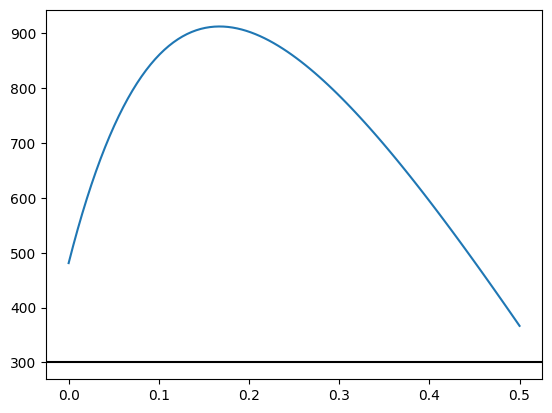

In [162]:
x = np.linspace(0,.5,100)
plt.plot(x,-temp(x))
plt.axhline(300,color = 'k')
xloc = sp.optimize.fmin(temp,x0=.05,full_output=False,disp=False)[0]
print(f'x: {xloc} \n y: {-temp(xloc)}')

In [163]:
x = -np.log(-c1*mu*k/qo)/mu

In [164]:
temp(x)
c1,c2

(np.float64(-2599.5324674852113), np.float64(1695.496884591924))

## Question 3

In [288]:
rco = 12.52e-3/2
rci = rco - 0.86e-3
rg = 230e-6
rfo = rci-rg
pf = .88 /.95
kc = 17
hg = 4300
kf = 2.417 #2.7 * pf #this is wrong
af =  rfo**2 * np.pi
p_ratio = rfo/rci
qpp = 44e3 / af #this is right it has to be... right?

In [289]:
c3 = p_ratio * qpp *rfo*rci / (-2 * kc)
c4 = 295 - c3*np.log(rco)
c_temp = lambda r : c3*np.log(r) + c4
# -kc*c3 / rci / hg +
c2 =  qpp*rfo / 2 / hg + temp_clad(rci) + qpp*rfo**2 / 4 / kf # should be 2112
f_temp = lambda r : -qpp*r**2 / 4 / kf + c2


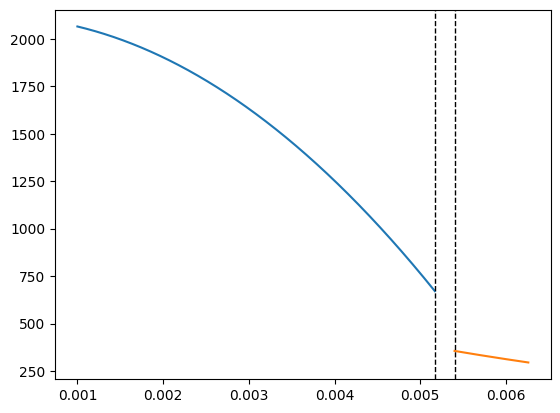

In [290]:
rf = np.linspace(1e-3,rfo,1000)
rc = np.linspace(rci,rco,1000)
plt.plot(rf,f_temp(rf))
plt.plot(rc,c_temp(rc))
plt.axvline(rfo,color = 'k',linestyle = '--',linewidth = 1)
plt.axvline(rci,color = 'k',linestyle = '--',linewidth = 1)

In [291]:
-qpp *rfo**2 / 4 /(664-2112)

2.4180999641033827

In [292]:
qpp*rfo / 2 / hg #should be 308.124

315.00236138920405

In [293]:
664 - c_temp(rci)

np.float64(308.1244121277882)

In [294]:
f_temp(rfo)

np.float64(670.8779492614158)

In [296]:
f_temp(0)-2112

np.float64(7.5369265149111015)

In [284]:
2.4180999641033827/2.7

0.8955925792975491

In [287]:
85.09/95

0.8956842105263159